## Some important inferences

* *has_geotechnical_risk_liquefaction*, *has_geotechnical_risk_other*, *has_geotechnical_risk_flood* are very less important in train dataset so we can remove them.

* *has_superstructure_cement_mortar_stone*, *has_superstructure_other*, *has_superstructure_other* are very less important in Building Structure so we can remove them.

* *'has_secondary_use_institution'*, *'has_secondary_use_school'*,
  *'has_secondary_use_industry'*, *'has_secondary_use_health_post'*,
  *'has_secondary_use_gov_office'*, *'has_secondary_use_use_police'*,
  *'has_secondary_use_other'* has no used whatsoever in our predictions 
  
  

* There are a lot of values in Build Structure which have less than 10 value counts which can be considered as outliers.


In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,normalize,scale
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


lb = LabelEncoder()
plt.rcParams['figure.figsize'] = (14,8)
pd.options.display.max_columns = 100

In [9]:
def counting_unique_value(df,col_name,from_no,to_no = 0):
    if to_no == 0: return [df.groupby(i).nunique()[col_name] for i in df.columns[from_no:]] 
    else: return [df.groupby(i).nunique()[col_name] for i in df.columns[from_no:to_no]]
    

In [6]:
train = pd.read_csv('./Datasets/Hackerearth earthquake/train.csv')
test = pd.read_csv('./Datasets/Hackerearth earthquake/test.csv')
Building_Ownership = pd.read_csv('./Datasets/Hackerearth earthquake/Building_Ownership_Use.csv')
Building_Sturct = pd.read_csv('./Datasets/Hackerearth earthquake/Building_Structure.csv')

In [59]:
train

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489,248903,3,3,21,385,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used,Private,2.0,0.0,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423,442304,3,3,33,602,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used,Private,1.0,1.0,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650,365008,3,3,2,700,21,21,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016,301605,3,0,3,315,20,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627,362705,2,2,22,285,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,0,0,0.0,2153,215301,3,0,41,400,19,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Private,0.0,0.0,0,0,0,0,0,0,0,0,0,0
6,Both,2beb42eaeee,Grade 2,30,1.0,0,0,0,1,0,0,1,0.0,3018,301809,1,1,3,87,7,7,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Brick/Stone,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,Public,1.0,0.0,0,0,0,0,0,0,0,0,0,0
7,Both,25e8adfd09a,Grade 5,26,0.0,0,0,0,0,0,0,0,0.0,2605,260508,3,0,50,440,21,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Timber-Planck,Attached-1 side,Rectangular,1,1,0,0,1,0,0,0,1,0,0,Damaged-Rubble unclear,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,0,0,NaN,2102,210204,2,2,1,620,12,12,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,1,0,1,0,0,0,1,0,Not damaged,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
9,Both,392cbd772c9,Grade 3,39,0.0,0,0,0,0,0,0,0,1.0,3929,392902,2,2,13,202,17,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


## EDA

In [ ]:
train.columns

In [ ]:
Building_Sturct.columns

In [ ]:
train.col = pd.DataFrame()
j = 0
for i in np.unique(train.damage_grade):
    
    temp = train[train.damage_grade == i]
    train.col = train.col.append([temp.groupby(i).nunique()['building_id'] for i in temp.columns[5:-1]],ignore_index=True)
    train.col.loc[j:j+8,'Grade'] = [i]*8
    j+=8

train.col.columns = ['Zero','One','Grade']

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=3)
for i,j in zip(np.unique(train.damage_grade),[[0,0],[0,1],[1,0],[1,1],[2,0]]):
    
    train.col[train.col.Grade == i].plot(kind = 'bar',ax = ax[j[0]][j[1]])
ax[2][0].set_xticklabels(train.columns[5:-1])

In [ ]:
build_col = pd.DataFrame()
build_col = build_col.append(counting_unique_value(Building_Sturct,'building_id',17,-1),ignore_index=True)

In [ ]:
fig, ax = plt.subplots()
build_col.plot(kind = 'bar',ax = ax)
ax.set_xticklabels(Building_Sturct.columns[17:-1])

In [ ]:
Building_Sturct.columns

In [ ]:
[Building_Sturct.groupby(i).nunique()['building_id'] for i in list(Building_Sturct.columns[4:])]

In [ ]:
pd.value_counts(Building_Sturct.age_building)[pd.value_counts(Building_Sturct.age_building) < 10]
pd.value_counts(Building_Sturct.plinth_area_sq_ft)[pd.value_counts(Building_Sturct.plinth_area_sq_ft) < 2]

fig, ax = plt.subplots(ncols= 4)

[Building_Sturct[i].plot(kind='box',ax = ax[j]) for i,j in zip(['age_building',
                                                                'plinth_area_sq_ft',
                                                                'height_ft_post_eq','height_ft_pre_eq'],range(4))]

In [ ]:
Building_Ownership.columns

In [ ]:
build_own_col = pd.DataFrame()
build_own_col = build_own_col.append(counting_unique_value(Building_Ownership,'building_id',7),ignore_index = True)

In [ ]:
fig, ax = plt.subplots()
build_own_col.plot(kind = 'bar', ax = ax)
ax.set_xticklabels(Building_Ownership.columns[7:])

## Preprocessing the data and Feature Engineering

In [5]:
def merge_and_drop(train,test):
    #merging train dataset
    train = train.merge(Building_Sturct.drop(['district_id','vdcmun_id'],axis = 1),how = 'left',on = 'building_id')
    train = train.merge(Building_Ownership.drop(['district_id','vdcmun_id','ward_id' ],axis = 1), how = 'left', on = 'building_id')
    
    #merging test dataset
    test = test.merge(Building_Sturct.drop(['district_id','vdcmun_id'],axis = 1), how = 'left', on = 'building_id')
    test = test.merge(Building_Ownership.drop(['district_id','vdcmun_id','ward_id' ],axis = 1), how = 'left', on = 'building_id')
    
    #converting from object data type to categories
    for i in ['condition_post_eq','legal_ownership_status','land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration','area_assesed','damage_grade']:
        train[[i]] = train[[i]].apply(lb.fit_transform)

    for i in ['condition_post_eq','legal_ownership_status','land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration','area_assesed']:
        test[[i]] = test[[i]].apply(lb.fit_transform)
    
    nan_rows = train[train['count_families'].isnull()]
    train = train.drop(np.array(nan_rows.index),axis = 0)
    train['sum_geotechnical'] = np.sum(train['has_geotechnical_risk',
                                             'has_geotechnical_risk_fault_crack',
                                            'has_geotechnical_risk_flood',
                                            'has_geotechnical_risk_land_settlement',
                                            'has_geotechnical_risk_landslide',
                                            'has_geotechnical_risk_liquefaction',
                                            'has_geotechnical_risk_other',
                                            'has_geotechnical_risk_rock_fall'])
    return (train.drop('has_repair_started',axis = 1),test.drop('has_repair_started',axis = 1))


In [ ]:
(train_aft, test_aft) = merge_and_drop(train, test)

In [ ]:
train_aft.loc[:,'volume_pre_eq'] = train_aft.plinth_area_sq_ft * train_aft.height_ft_pre_eq
train_aft.loc[:,'height_diff'] = train_aft.height_ft_pre_eq - train_aft.height_ft_post_eq
train_aft.loc[:,'floors_diff'] = train_aft.count_floors_pre_eq - train_aft.count_floors_post_eq
train_aft.loc[:,'carpet_area_sq_ft'] = train_aft.plinth_area_sq_ft - (train_aft.plinth_area_sq_ft*0.15)

test_aft.loc[:,'volume_pre_eq'] = test_aft.plinth_area_sq_ft * train_aft.height_ft_pre_eq
test_aft.loc[:,'height_diff'] = test_aft.height_ft_pre_eq - test_aft.height_ft_post_eq
test_aft.loc[:,'floors_diff'] = test_aft.count_floors_pre_eq - test_aft.count_floors_post_eq
test_aft.loc[:,'carpet_area_sq_ft'] = test_aft.plinth_area_sq_ft - (test_aft.plinth_area_sq_ft*0.15)


In [14]:
def sum_col(df,cols):
    temp = 0
    for i in cols:
        temp += df[i]
    return temp

In [12]:
def new_features(df):
    new_features_vdcmun = pd.DataFrame()
    new_features_dis = pd.DataFrame()
    new_features_ward = pd.DataFrame()
#     new_features_locality = pd.DataFrame()

    for j in ['age_building',
             'height_ft_pre_eq',
              'plinth_area_sq_ft',
              'carpet_area_sq_ft',
              'volume_pre_eq',
              'height_diff']:
        new_features_vdcmun.loc[:,f'mean_{j}_vdcmun'] = pd.Series([np.mean(df[df.vdcmun_id == i][j]) for i in np.unique(df.vdcmun_id)],dtype = 'int64')
        new_features_dis.loc[:,f'mean_{j}_dis'] = pd.Series([np.mean(df[df.district_id == i][j]) for i in np.unique(df.district_id)],dtype = 'int64')
        new_features_ward.loc[:,f'mean_{j}_ward'] = pd.Series([np.mean(df[df.ward_id == i][j]) for i in np.unique(df.ward_id)],dtype = 'int64')
#         new_features_locality.loc[:,f'mean_{j}_locality'] = pd.Series([np.mean(df[df.locality == i][j]) for i in np.unique(df.locality)],dtype = 'int64')
        
    
    new_features_dis.loc[:,'district_id'] = np.unique(df.district_id)
    new_features_vdcmun.loc[:,'vdcmun_id'] = np.unique(df.vdcmun_id)
    new_features_ward.loc[:,'ward_id'] = np.unique(df.ward_id)
#     new_features_locality.loc[:,'locality'] = np.unique(df.locality)

    df = df.merge(new_features_dis, how= 'inner', on = 'district_id')
    df = df.merge(new_features_vdcmun, how = 'inner', on = 'vdcmun_id')
    df = df.merge(new_features_ward,how = 'inner', on = 'ward_id')
#     df = df.merge(new_features_locality,how = 'inner', on = 'locality')
    geo = ['has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall']
    subsut = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']
    sec = ['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']
    df['sum_geotechnical'] = sum_col(df,geo)
    df['sum_substructure'] = sum_col(df,subsut)
    df['sum_secondary'] = sum_col(df,sec)
        
    return df

In [ ]:
train_df = new_features(train_aft)
test_df = new_features(test_aft)

In [169]:

#Pure test and train
train_dmat = xgb.DMatrix(train_aft.drop(['building_id',
                                         'damage_grade',
                                        'has_secondary_use_use_police',
                                        'has_secondary_use_health_post',
                                        'has_secondary_use_gov_office',
                                        'has_secondary_use_school',
                                        'has_secondary_use_institution',
                                        'has_geotechnical_risk_other',
                                        'has_secondary_use_industry',
                                        'has_secondary_use_other',
                                        'has_secondary_use_rental',
                                        'has_geotechnical_risk_liquefaction'],axis = 1),train_aft.damage_grade)
test_dmat = xgb.DMatrix(test_aft.drop(['building_id',
                                      'has_secondary_use_use_police',
                                        'has_secondary_use_health_post',
                                        'has_secondary_use_gov_office',
                                        'has_secondary_use_school',
                                        'has_secondary_use_institution',
                                        'has_geotechnical_risk_other',
                                        'has_secondary_use_industry',
                                        'has_secondary_use_other',
                                        'has_secondary_use_rental',
                                        'has_geotechnical_risk_liquefaction'],axis = 1))

## Xgboost

In [165]:

#for checking accuracy

x_train,x_test,y_train,y_test = train_test_split(train_df.drop(['building_id',
                                                                'damage_grade',
                                                                'has_secondary_use_use_police',
                                                                'has_secondary_use_health_post',
                                                                'has_secondary_use_gov_office',
                                                                'has_secondary_use_school',
                                                                'has_secondary_use_institution',
                                                                'has_geotechnical_risk_other',
                                                                'has_secondary_use_industry',
                                                                'has_secondary_use_other',
                                                                'has_secondary_use_rental',
                                                                'has_geotechnical_risk_liquefaction'],axis = 1), 
                                                 train_df.damage_grade, test_size = 0.2,random_state = 42)

train_dmat = xgb.DMatrix(x_train, y_train)
test_dmat = xgb.DMatrix(x_test,y_test)

In [182]:
#0.237
params = {
    'num_class':5,
    'learning_rate':0.3,
    'n_estimators':2500,
    'max_depth':15,
    'objective':'multi:softmax',
    'n_jobs':6,
    'subsample':0.95,
    'colsample_bytree':0.85,
    'eta':0.05,
    'seed':42
}

#n_estimators do not affect 
#0.24 on this 
watchlist = [(train_dmat,'train'),(test_dmat,'test')]
# params = {
#     'num_class':5,
#     'learning_rate':0.3,
#     'n_estimators':2500,
#     'max_depth':10,
#     'objective':'multi:softmax',
#     'n_jobs':6,
#     'subsample':0.8,
#     'colsample_bytree':0.85,
#     'min_child_weight':20,
#     'seed':42
    
# }


bst = xgb.train(params,train_dmat,50)
# [19]	train-merror:0.270484	test-merror:0.276889
# [49]	train-merror:0.228112	test-merror:0.248223
# [49]	train-merror:0.115074	test-merror:0.238362
# [49]	train-merror:0.115074	test-merror:0.238362
# [49]	train-merror:0.116201	test-merror:0.237856 with seed off

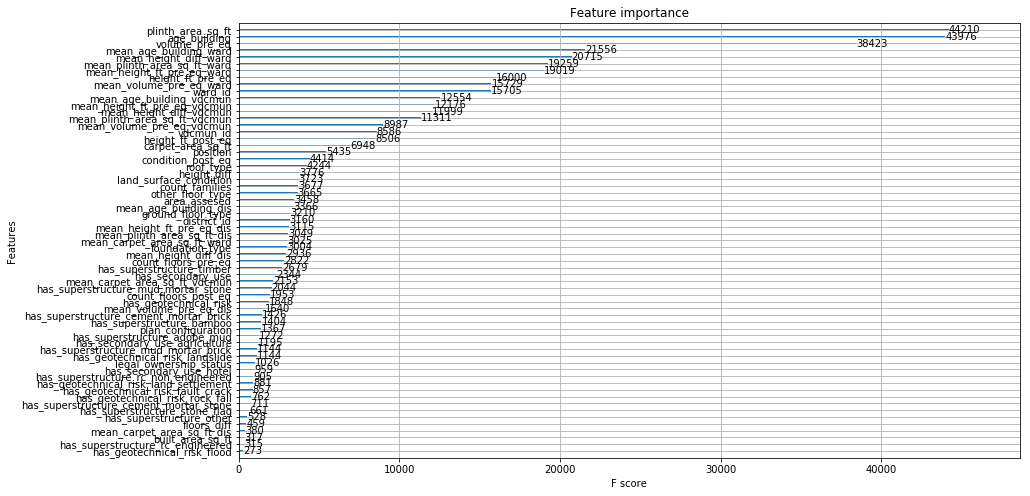

In [154]:
xgb.plot_importance(bst)

In [183]:
y_preds_xgb = bst.predict(test_dmat)

In [26]:
len(np.where(y_preds_xgb != y_test)[0])

15189

In [168]:
accuracy_score(y_test,y_preds_xgb)

0.7751598708370268

In [184]:
predictions = list()

for i in y_preds_xgb:
    if i == 0:
        predictions.append('Grade 1')
    elif i == 1:
        predictions.append('Grade 2')
    elif i == 2:
        predictions.append('Grade 3')
    elif i == 3:
        predictions.append('Grade 4')
    else :
        predictions.append('Grade 5')
    

In [185]:
submission= pd.DataFrame()

In [186]:
submission.loc[:,'building_id'] = test.building_id
submission.loc[:, 'damage_grade'] = predictions

In [187]:
submission.to_csv('./submission.csv',index = False)

## Catboost

In [4]:
import catboost as cb

In [10]:
train = train.merge(Building_Sturct.drop(['district_id','vdcmun_id'],axis = 1),how = 'left',on = 'building_id')
train = train.merge(Building_Ownership.drop(['district_id','vdcmun_id','ward_id' ],axis = 1), how = 'left', on = 'building_id')

#merging test dataset
test = test.merge(Building_Sturct.drop(['district_id','vdcmun_id'],axis = 1), how = 'left', on = 'building_id')
test = test.merge(Building_Ownership.drop(['district_id','vdcmun_id','ward_id' ],axis = 1), how = 'left', on = 'building_id')

nan_rows = train[train['count_families'].isnull()]
train = train.drop(np.array(nan_rows.index),axis = 0)

In [15]:
train_aft = train.copy()
test_aft = test.copy()

train_aft.loc[:,'volume_pre_eq'] = train_aft.plinth_area_sq_ft * train_aft.height_ft_pre_eq
train_aft.loc[:,'height_diff'] = train_aft.height_ft_pre_eq - train_aft.height_ft_post_eq
train_aft.loc[:,'floors_diff'] = train_aft.count_floors_pre_eq - train_aft.count_floors_post_eq
train_aft.loc[:,'carpet_area_sq_ft'] = train_aft.plinth_area_sq_ft - (train_aft.plinth_area_sq_ft*0.15)
train_aft['locality'] = [i[:-3]  for i in train_aft.building_id]


test_aft['locality'] = [i[:-3] for i in test_aft.building_id]
test_aft.loc[:,'volume_pre_eq'] = test_aft.plinth_area_sq_ft * train_aft.height_ft_pre_eq
test_aft.loc[:,'height_diff'] = test_aft.height_ft_pre_eq - test_aft.height_ft_post_eq
test_aft.loc[:,'floors_diff'] = test_aft.count_floors_pre_eq - test_aft.count_floors_post_eq
test_aft.loc[:,'carpet_area_sq_ft'] = test_aft.plinth_area_sq_ft - (test_aft.plinth_area_sq_ft*0.15)

train_aft = new_features(train_aft)
test_aft = new_features(test_aft)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(train_aft.drop(['building_id',
                                                            'damage_grade',
                                                            'has_repair_started'],axis = 1), 
                                                 train_aft.damage_grade, test_size = 0.1,random_state = 42)

In [49]:
imp_feat = ['mean_height_diff_ward',
 'land_surface_condition',
 'has_superstructure_cement_mortar_brick',
 'sum_geotechnical',
 'mean_volume_pre_eq_ward',
 'mean_carpet_area_sq_ft_ward',
 'mean_plinth_area_sq_ft_dis',
 'has_geotechnical_risk_land_settlement',
 'plinth_area_sq_ft',
 'sum_secondary',
 'mean_volume_pre_eq_vdcmun',
 'mean_height_ft_pre_eq_ward',
 'volume_pre_eq',
 'has_superstructure_mud_mortar_stone',
 'mean_age_building_dis',
 'other_floor_type',
 'count_families',
 'mean_age_building_ward',
 'mean_age_building_vdcmun',
 'roof_type',
 'height_diff',
 'foundation_type',
 'ground_floor_type',
 'district_id',
 'area_assesed',
 'locality',
 'age_building',
 'count_floors_post_eq',
 'floors_diff',
 'height_ft_post_eq',
 'vdcmun_id',
 'ward_id',
 'condition_post_eq']

In [16]:
y_train = lb.fit_transform(train_aft.damage_grade)
# y_test = lb.fit_transform(test_aft.damage_grade)

In [24]:
x_train = train_aft.drop(['building_id','damage_grade','has_repair_started'],axis = 1)
x_test = test_aft.drop(['building_id','has_repair_started'],axis = 1)

In [18]:
columns = pd.Series(x_train.columns)

In [27]:
x_test.columns = columns

In [20]:

cat_var = columns.drop(index=[14,15,16,17,50,51,
 52,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,75]).index
# ,69,70,71

range(33, 50)

In [21]:
# y_train = lb.fit_transform(train.damage_grade)
ctb = cb.CatBoostClassifier(depth = 6,
                            iterations = 500, 
                            l2_leaf_reg = 3,
                            learning_rate = 0.06,
                            classes_count = 5,
                            loss_function = 'MultiClass',
                            thread_count = 6)

In [22]:
ctb.fit(x_train,y_train,cat_features = np.array(cat_var))

0:	learn: -1.4839362	total: 10.1s	remaining: 1h 23m 36s
1:	learn: -1.3872288	total: 20.3s	remaining: 1h 24m 16s
2:	learn: -1.3055998	total: 29.4s	remaining: 1h 21m 8s
3:	learn: -1.2375993	total: 38.5s	remaining: 1h 19m 37s
4:	learn: -1.1795215	total: 48s	remaining: 1h 19m 11s
5:	learn: -1.1290369	total: 57.3s	remaining: 1h 18m 40s
6:	learn: -1.0852037	total: 1m 6s	remaining: 1h 17m 42s
7:	learn: -1.0461809	total: 1m 14s	remaining: 1h 16m 34s
8:	learn: -1.0112501	total: 1m 22s	remaining: 1h 15m 18s
9:	learn: -0.9798950	total: 1m 31s	remaining: 1h 15m 4s
10:	learn: -0.9515637	total: 1m 41s	remaining: 1h 15m 24s
11:	learn: -0.9260423	total: 1m 51s	remaining: 1h 15m 31s
12:	learn: -0.9029195	total: 2m	remaining: 1h 15m
13:	learn: -0.8815909	total: 2m 9s	remaining: 1h 15m
14:	learn: -0.8619794	total: 2m 18s	remaining: 1h 14m 47s
15:	learn: -0.8425090	total: 2m 28s	remaining: 1h 14m 55s
16:	learn: -0.8246449	total: 2m 37s	remaining: 1h 14m 41s
17:	learn: -0.8084545	total: 2m 47s	remaining: 1

144:	learn: -0.5252366	total: 23m 6s	remaining: 56m 34s
145:	learn: -0.5250182	total: 23m 17s	remaining: 56m 27s
146:	learn: -0.5248267	total: 23m 26s	remaining: 56m 18s
147:	learn: -0.5246548	total: 23m 34s	remaining: 56m 3s
148:	learn: -0.5244776	total: 23m 43s	remaining: 55m 53s
149:	learn: -0.5242782	total: 23m 53s	remaining: 55m 44s
150:	learn: -0.5241406	total: 24m 2s	remaining: 55m 32s
151:	learn: -0.5239270	total: 24m 11s	remaining: 55m 23s
152:	learn: -0.5237306	total: 24m 20s	remaining: 55m 12s
153:	learn: -0.5235677	total: 24m 30s	remaining: 55m 4s
154:	learn: -0.5234045	total: 24m 40s	remaining: 54m 55s
155:	learn: -0.5231997	total: 24m 51s	remaining: 54m 48s
156:	learn: -0.5230577	total: 24m 59s	remaining: 54m 36s
157:	learn: -0.5228955	total: 25m 9s	remaining: 54m 27s
158:	learn: -0.5226279	total: 25m 19s	remaining: 54m 17s
159:	learn: -0.5224283	total: 25m 29s	remaining: 54m 10s
160:	learn: -0.5222916	total: 25m 38s	remaining: 53m 59s
161:	learn: -0.5220828	total: 25m 49

289:	learn: -0.5099814	total: 47m 3s	remaining: 34m 4s
290:	learn: -0.5099430	total: 47m 14s	remaining: 33m 55s
291:	learn: -0.5098936	total: 47m 25s	remaining: 33m 46s
292:	learn: -0.5098851	total: 47m 35s	remaining: 33m 37s
293:	learn: -0.5098274	total: 47m 46s	remaining: 33m 28s
294:	learn: -0.5097837	total: 47m 58s	remaining: 33m 19s
295:	learn: -0.5097429	total: 48m 8s	remaining: 33m 10s
296:	learn: -0.5096836	total: 48m 19s	remaining: 33m 1s
297:	learn: -0.5095593	total: 48m 29s	remaining: 32m 52s
298:	learn: -0.5095316	total: 48m 39s	remaining: 32m 42s
299:	learn: -0.5094809	total: 48m 48s	remaining: 32m 32s
300:	learn: -0.5094025	total: 48m 59s	remaining: 32m 23s
301:	learn: -0.5092882	total: 49m 9s	remaining: 32m 13s
302:	learn: -0.5092171	total: 49m 21s	remaining: 32m 5s
303:	learn: -0.5091840	total: 49m 31s	remaining: 31m 56s
304:	learn: -0.5091327	total: 49m 41s	remaining: 31m 46s
305:	learn: -0.5090703	total: 49m 49s	remaining: 31m 35s
306:	learn: -0.5090227	total: 50m	rem

432:	learn: -0.5041132	total: 1h 11m 9s	remaining: 11m
433:	learn: -0.5040886	total: 1h 11m 19s	remaining: 10m 50s
434:	learn: -0.5040381	total: 1h 11m 30s	remaining: 10m 41s
435:	learn: -0.5040006	total: 1h 11m 40s	remaining: 10m 31s
436:	learn: -0.5039748	total: 1h 11m 51s	remaining: 10m 21s
437:	learn: -0.5039332	total: 1h 12m 2s	remaining: 10m 11s
438:	learn: -0.5039326	total: 1h 12m 13s	remaining: 10m 2s
439:	learn: -0.5039002	total: 1h 12m 24s	remaining: 9m 52s
440:	learn: -0.5038800	total: 1h 12m 34s	remaining: 9m 42s
441:	learn: -0.5038559	total: 1h 12m 45s	remaining: 9m 32s
442:	learn: -0.5038281	total: 1h 12m 55s	remaining: 9m 23s
443:	learn: -0.5038113	total: 1h 13m 5s	remaining: 9m 13s
444:	learn: -0.5037868	total: 1h 13m 16s	remaining: 9m 3s
445:	learn: -0.5037593	total: 1h 13m 26s	remaining: 8m 53s
446:	learn: -0.5037384	total: 1h 13m 37s	remaining: 8m 43s
447:	learn: -0.5037273	total: 1h 13m 48s	remaining: 8m 34s
448:	learn: -0.5037078	total: 1h 13m 59s	remaining: 8m 24s

In [55]:
y_preds = ctb.predict(x_test)
accuracy_score(y_test, y_preds)

0.782132455362796

In [56]:
feat_imp = pd.DataFrame()
feat_imp['features'] = x_train.columns
feat_imp['feat_import'] = ctb.feature_importances_

In [48]:
imp_feat

['mean_height_diff_ward',
 'land_surface_condition',
 'has_superstructure_cement_mortar_brick',
 'sum_geotechnical',
 'mean_volume_pre_eq_ward',
 'mean_carpet_area_sq_ft_ward',
 'mean_plinth_area_sq_ft_dis',
 'has_geotechnical_risk_land_settlement',
 'plinth_area_sq_ft',
 'sum_secondary',
 'mean_volume_pre_eq_vdcmun',
 'mean_height_ft_pre_eq_ward',
 'volume_pre_eq',
 'has_superstructure_mud_mortar_stone',
 'mean_age_building_dis',
 'other_floor_type',
 'count_families',
 'mean_age_building_ward',
 'mean_age_building_vdcmun',
 'roof_type',
 'height_diff',
 'foundation_type',
 'ground_floor_type',
 'district_id',
 'area_assesed',
 'locality',
 'age_building',
 'count_floors_post_eq',
 'floors_diff',
 'height_ft_post_eq',
 'vdcmun_id',
 'ward_id',
 'condition_post_eq']

In [47]:
imp_feat = feat_imp[feat_imp['feat_import'] > 0.3].features.tolist()

In [57]:
feat_imp = feat_imp.sort_values(by = 'feat_import')

<BarContainer object of 33 artists>

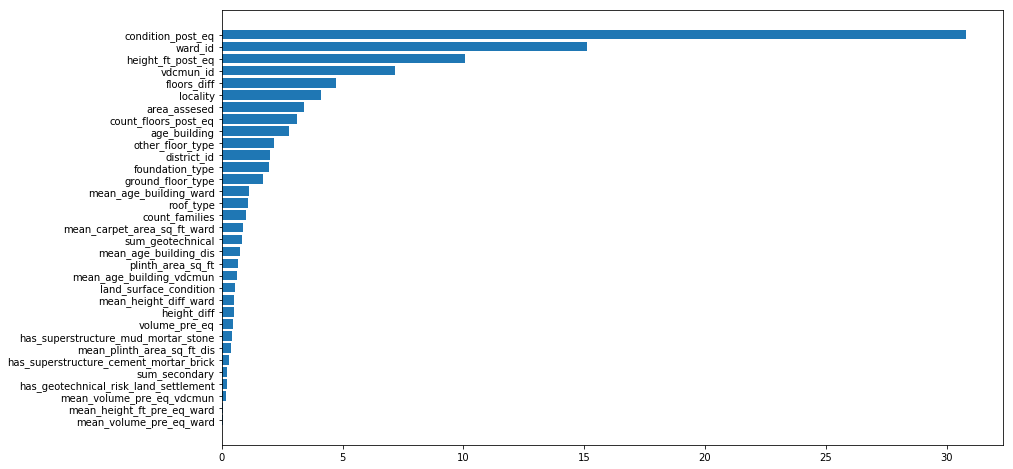

In [58]:
plt.barh(feat_imp.features,feat_imp.feat_import)

In [ ]:
y_pred = ctb.predict(x_test)
predictions = list()

for i in y_pred:
    if i == 0:
        predictions.append('Grade 1')
    elif i == 1:
        predictions.append('Grade 2')
    elif i == 2:
        predictions.append('Grade 3')
    elif i == 3:
        predictions.append('Grade 4')
    else :
        predictions.append('Grade 5')
    

In [ ]:
submission= pd.DataFrame()

In [ ]:
submission.loc[:,'building_id'] = test.building_id
submission.loc[:, 'damage_grade'] = predictions

building_id     0
damage_grade    0
dtype: int64

In [76]:
submission.to_csv('./submission.csv',index = False)